In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
from transformers import AutoModelForSequenceClassification
from transformers import AutoModel

# API Call(BanglaBERT)

### Using Model1 [Violence(1) vs non-violence(0)]

In [2]:
from transformers import AutoTokenizer, pipeline
import torch
import pandas as pd

# Load tokenizer and model
model = pipeline("text-classification", model="ka05ar/banglabert-VITD-m1opt", tokenizer="ka05ar/banglabert-VITD-m1opt")

# Load your data
data = pd.read_csv("/kaggle/input/emnlp-task1/test.csv", encoding='utf8')
texts = data["text"].tolist()

# Pass the texts to the model for classification
with torch.no_grad():
    predictions = model(texts)

# Get predicted probabilities and labels
predicted_labels = [pred['label'] for pred in predictions]
probs = [pred['score'] for pred in predictions]

# Create new columns in the DataFrame
data['predicted_label'] = predicted_labels
data['predicted_probability'] = probs

    


In [3]:
data

,text,predicted_label,predicted_probability
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.993967
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,LABEL_0,0.999205
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",LABEL_0,0.999288
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_1,0.997731
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,LABEL_0,0.997779
...,...,...,...
2011,নিজের ধর্মের পরিধানটি কোনো ধর্ম স্থানেই ভালো ম...,LABEL_0,0.997093
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,LABEL_1,0.999699
2013,ভারত ধ্বংস হবে অতি দ্রুত,LABEL_1,0.999696
2014,ভারতীয় উপমহাদেশে উপর আল্লাহর গজব নাজিল হোক আমি...,LABEL_1,0.999686


In [4]:
data['label'] = data['predicted_label'].apply(lambda x: 1 if x=='LABEL_1' else 0)

In [5]:
data

,text,predicted_label,predicted_probability,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.993967,1
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,LABEL_0,0.999205,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",LABEL_0,0.999288,0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_1,0.997731,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,LABEL_0,0.997779,0
...,...,...,...,...
2011,নিজের ধর্মের পরিধানটি কোনো ধর্ম স্থানেই ভালো ম...,LABEL_0,0.997093,0
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,LABEL_1,0.999699,1
2013,ভারত ধ্বংস হবে অতি দ্রুত,LABEL_1,0.999696,1
2014,ভারতীয় উপমহাদেশে উপর আল্লাহর গজব নাজিল হোক আমি...,LABEL_1,0.999686,1


In [6]:
data.to_csv("test_predicted_results_m1.csv", index=False)

### Using Model2 [Passive Violence(0-->1) vs Direct-violence(1-->2)]

In [7]:
data

,text,predicted_label,predicted_probability,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.993967,1
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,LABEL_0,0.999205,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",LABEL_0,0.999288,0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_1,0.997731,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,LABEL_0,0.997779,0
...,...,...,...,...
2011,নিজের ধর্মের পরিধানটি কোনো ধর্ম স্থানেই ভালো ম...,LABEL_0,0.997093,0
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,LABEL_1,0.999699,1
2013,ভারত ধ্বংস হবে অতি দ্রুত,LABEL_1,0.999696,1
2014,ভারতীয় উপমহাদেশে উপর আল্লাহর গজব নাজিল হোক আমি...,LABEL_1,0.999686,1


In [8]:
violent_only_data = data.copy()

In [9]:
violent_only_data = violent_only_data[violent_only_data['label']==1]

In [10]:
violent_only_data

,text,predicted_label,predicted_probability,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.993967,1
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_1,0.997731,1
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",LABEL_1,0.996101,1
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,LABEL_1,0.997595,1
12,কুরআনকে যখন অবমাননা করা হলো আপনারা একটা নিউজ ক...,LABEL_1,0.999713,1
...,...,...,...,...
2003,ভারত সব সময় র্ধমের উস্কানি দেয়,LABEL_1,0.999710,1
2006,হিন্দু সম্প্রদায়ের লেখটা হাটেলে দোষ নেই মুসলমা...,LABEL_1,0.988327,1
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,LABEL_1,0.999699,1
2013,ভারত ধ্বংস হবে অতি দ্রুত,LABEL_1,0.999696,1


In [11]:
violent_only_data = violent_only_data.drop(["predicted_label","predicted_probability","label"],axis=1)

In [12]:
violent_only_data

,text
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব..."
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...
12,কুরআনকে যখন অবমাননা করা হলো আপনারা একটা নিউজ ক...
...,...
2003,ভারত সব সময় র্ধমের উস্কানি দেয়
2006,হিন্দু সম্প্রদায়ের লেখটা হাটেলে দোষ নেই মুসলমা...
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...
2013,ভারত ধ্বংস হবে অতি দ্রুত


In [13]:
from transformers import AutoTokenizer, pipeline
import torch
import pandas as pd

# Load tokenizer and model
model = pipeline("text-classification", model="ka05ar/banglabert-VITD-mt2", tokenizer="ka05ar/banglabert-VITD-mt2")

# Load your data
# data = pd.read_csv("/kaggle/input/emnlp20230-task1/test.csv", encoding='utf8')
texts = violent_only_data["text"].tolist()

# Pass the texts to the model for classification
with torch.no_grad():
    predictions = model(texts)

# Get predicted probabilities and labels
predicted_labels = [pred['label'] for pred in predictions]
probs = [pred['score'] for pred in predictions]

# Create new columns in the DataFrame
violent_only_data['predicted_label'] = predicted_labels
violent_only_data['predicted_probability'] = probs

# Save the modified DataFrame to a new CSV file

# Print results
# for i, (predicted_label, prob) in enumerate(zip(predicted_labels, probs)):
#     print(f"Text: {texts[i]}")
#     print(f"Predicted Label: {predicted_label}")
#     print(f"Predicted Probability: {prob}")
#     print()

In [14]:
violent_only_data.head(20)

,text,predicted_label,predicted_probability
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.948469
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_0,0.990439
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",LABEL_0,0.953352
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,LABEL_0,0.989523
12,কুরআনকে যখন অবমাননা করা হলো আপনারা একটা নিউজ ক...,LABEL_0,0.991950
13,মিথ্যা বাদি ওবাইদেরকাদের কথা বিশ্বাস করবেন না,LABEL_0,0.989598
14,একটি মহল দেশে আন্দলন করবে বলে হুমকি দমকি দিচ্ছ...,LABEL_0,0.992554
16,৪-৫ জন লোককে নির্বিচারে হত্যা করছে এ নিয়ে ভারত...,LABEL_0,0.990688
19,সরকার এরকম তো বহুতে আশ্বাস দেয় বালের মাথা কিছু...,LABEL_0,0.990914
20,অপশক্তি বলতে ওবায়দুল কাদের ইসলামপন্থীদেরকে বু...,LABEL_0,0.989252


In [15]:
violent_only_data['label'] = violent_only_data['predicted_label'].apply(lambda x: 2 if x=='LABEL_1' else 1)

In [16]:
violent_only_data.head(20)

,text,predicted_label,predicted_probability,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.948469,2
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_0,0.990439,1
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",LABEL_0,0.953352,1
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,LABEL_0,0.989523,1
12,কুরআনকে যখন অবমাননা করা হলো আপনারা একটা নিউজ ক...,LABEL_0,0.991950,1
13,মিথ্যা বাদি ওবাইদেরকাদের কথা বিশ্বাস করবেন না,LABEL_0,0.989598,1
14,একটি মহল দেশে আন্দলন করবে বলে হুমকি দমকি দিচ্ছ...,LABEL_0,0.992554,1
16,৪-৫ জন লোককে নির্বিচারে হত্যা করছে এ নিয়ে ভারত...,LABEL_0,0.990688,1
19,সরকার এরকম তো বহুতে আশ্বাস দেয় বালের মাথা কিছু...,LABEL_0,0.990914,1
20,অপশক্তি বলতে ওবায়দুল কাদের ইসলামপন্থীদেরকে বু...,LABEL_0,0.989252,1


In [17]:
violent_only_data = violent_only_data.drop(["predicted_label","predicted_probability"],axis=1)

In [18]:
violent_only_data.head(20)

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,2
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,1
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",1
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,1
12,কুরআনকে যখন অবমাননা করা হলো আপনারা একটা নিউজ ক...,1
13,মিথ্যা বাদি ওবাইদেরকাদের কথা বিশ্বাস করবেন না,1
14,একটি মহল দেশে আন্দলন করবে বলে হুমকি দমকি দিচ্ছ...,1
16,৪-৫ জন লোককে নির্বিচারে হত্যা করছে এ নিয়ে ভারত...,1
19,সরকার এরকম তো বহুতে আশ্বাস দেয় বালের মাথা কিছু...,1
20,অপশক্তি বলতে ওবায়দুল কাদের ইসলামপন্থীদেরকে বু...,1


In [19]:
# Assuming df_original and df_changed have been defined

# Update only the rows with changed label values
changed_indices = violent_only_data.index
data.loc[changed_indices, 'label'] = violent_only_data['label']


In [20]:
data.head(20)

,text,predicted_label,predicted_probability,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,LABEL_1,0.993967,2
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,LABEL_0,0.999205,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",LABEL_0,0.999288,0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,LABEL_1,0.997731,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,LABEL_0,0.997779,0
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",LABEL_1,0.996101,1
6,কোরআন কে কেন অবমাননা করা হল? মুসলিমরা কি দোষ ক...,LABEL_0,0.998637,0
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,LABEL_1,0.997595,1
8,সন্চালককে বলতে চাই কথাটি হবে দেব দেবীর পায়ে কো...,LABEL_0,0.998603,0
9,কোরান অবমাননা না বলে পাওয়া গেছে বলেন কেন?,LABEL_0,0.998024,0


In [21]:
data.shape

(2016, 4)

In [22]:
data = data.drop(['predicted_label',"predicted_probability"],axis=1)

In [23]:
data.head(20)

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,2
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,0
5,"কোরআন পাওয়া গেছে, কোরআন পাওয়া গেছে,যেমন ভাবে ব...",1
6,কোরআন কে কেন অবমাননা করা হল? মুসলিমরা কি দোষ ক...,0
7,আমরা হিন্দু রা কুরআন পূজা করি না। এটা সম্পূর্ণ...,1
8,সন্চালককে বলতে চাই কথাটি হবে দেব দেবীর পায়ে কো...,0
9,কোরান অবমাননা না বলে পাওয়া গেছে বলেন কেন?,0


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# def compute_metrics(pred):
#     labels = pred.label_ids
#     preds = pred.predictions.argmax(-1)
#     f1 = f1_score(labels, preds, average="macro")
# #     acc = accuracy_score(labels,preds)
#     return {"Macro F1 Score": f1}

In [25]:
preds = data['label']

In [26]:
original_output = pd.read_csv("/kaggle/input/emnlp-task1-test-data/test_task1.csv",encoding='utf8')
labels = original_output['label']

In [27]:
macro_f1 = f1_score(labels, preds, average="macro")

In [28]:
macro_f1

0.7226784717143468

In [29]:
acc = accuracy_score(labels,preds)
acc

0.7713293650793651

In [30]:
precision = precision_score(labels, preds,average="macro")
precision

0.7108377312870683

In [31]:
recall = recall_score(labels, preds,average="macro")
recall

0.7713298951809416

In [32]:
macro_f1, acc, precision, recall

(0.7226784717143468,
 0.7713293650793651,
 0.7108377312870683,
 0.7713298951809416)

In [33]:
acc, precision, recall, macro_f1

(0.7713293650793651,
 0.7108377312870683,
 0.7713298951809416,
 0.7226784717143468)

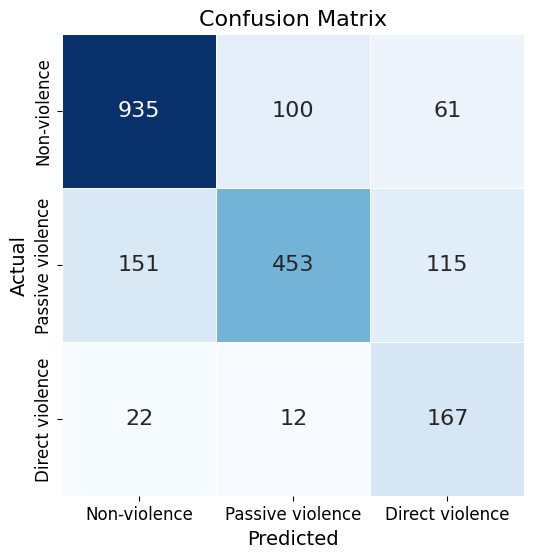

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels, preds)

# Create a heatmap
plt.figure(figsize=(8, 6))

# Increase font size for values, labels, and class names
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True, cbar=False,
            xticklabels=["Non-violence", "Passive violence", "Direct violence"],
            yticklabels=["Non-violence", "Passive violence", "Direct violence"],
            annot_kws={"size": 16})  # Adjust the font size for values here

# Increase font size for xticklabels and yticklabels
plt.xticks(fontsize=12)  # Adjust the font size for xticklabels
plt.yticks(fontsize=12)  # Adjust the font size for yticklabels

plt.xlabel('Predicted', fontsize=14)  # Adjust the font size for x-label
plt.ylabel('Actual', fontsize=14)  # Adjust the font size for y-label
plt.title('Confusion Matrix', fontsize=16)  # Adjust the font size for the title
plt.show()

In [35]:
preds[preds==0].shape,preds[preds==1].shape,preds[preds==2].shape

((1108,), (565,), (343,))

In [36]:
labels[labels==0].shape,labels[labels==1].shape,labels[labels==2].shape

((1096,), (719,), (201,))

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Create a sample confusion matrix (replace this with your actual confusion matrix)
# Each row represents the true class, and each column represents the predicted class.
conf_matrix = np.array([[50, 10],
                        [5, 35]])

# Define class labels
class_labels = ["Class A", "Class B"]

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        text = ax.text(j, i, format(conf_matrix[i, j], 'd'),
                       ha="center", va="center", color="w")

plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [ ]:
9